In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Volks = data.DataReader("VOW3.DE", data_source="yahoo", start = "1998-07-01", end = "2019-06-01")
Volks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1998-07-22,65.053703,63.148201,63.148201,64.596497,56337.0,34.962700
1998-07-23,65.816101,61.750599,65.308197,61.750599,95571.0,33.422371
1998-07-24,62.258499,59.869900,60.988201,61.496101,154423.0,33.284630
1998-07-27,62.005001,59.463299,61.496101,59.717800,62876.0,32.322124
1998-07-28,61.445400,57.837101,59.209900,58.294399,116195.0,31.551706


In [3]:
Volks.shape

(5288, 6)

In [4]:
Volks_train = Volks.iloc[:4500, :]
Volks_train.shape

(4500, 6)

In [5]:
Volks_test = Volks.iloc[4500:, :]
Volks_test.shape

(788, 6)

In [6]:
training_set = Volks.iloc[:5000, 2:3].values
training_set

array([[ 63.14820099],
       [ 65.30819702],
       [ 60.98820114],
       ...,
       [155.47999573],
       [155.96000671],
       [159.61999512]])

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 4499):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
4439/4439 [==============================] - 47s 11ms/step - loss: 0.0079
Epoch 2/100
4439/4439 [==============================] - 42s 9ms/step - loss: 0.0022
Epoch 3/100
4439/4439 [==============================] - 42s 9ms/step - loss: 0.0020
Epoch 4/100
4439/4439 [==============================] - 41s 9ms/step - loss: 0.0017
Epoch 5/100
4439/4439 [==============================] - 41s 9ms/step - loss: 0.0017
Epoch 6/100
4439/4439 [==============================] - 40s 9ms/step - loss: 0.0017
Epoch 7/100
4439/4439 [==============================] - 43s 10ms/step - loss: 0.0014
Epoch 8/100
4439/4439 [==============================] - 42s 9ms/step - loss: 0.0013
Epoch 9/100
4439/4439 [==============================] - 42s 9ms/step - loss: 0.001

4439/4439 [==============================] - 208s 47ms/step - loss: 5.8264e-04
Epoch 82/100
4439/4439 [==============================] - 190s 43ms/step - loss: 5.9649e-04
Epoch 83/100
4439/4439 [==============================] - 194s 44ms/step - loss: 6.3622e-04
Epoch 84/100
4439/4439 [==============================] - 200s 45ms/step - loss: 5.7945e-04
Epoch 85/100
4439/4439 [==============================] - 189s 43ms/step - loss: 5.7138e-04
Epoch 86/100
4439/4439 [==============================] - 194s 44ms/step - loss: 5.9150e-04
Epoch 87/100
4439/4439 [==============================] - 195s 44ms/step - loss: 6.5113e-04
Epoch 88/100
4439/4439 [==============================] - 189s 43ms/step - loss: 5.5180e-04
Epoch 89/100
4439/4439 [==============================] - 195s 44ms/step - loss: 6.3446e-04
Epoch 90/100
4439/4439 [==============================] - 193s 44ms/step - loss: 5.4622e-04
Epoch 91/100
4439/4439 [==============================] - 192s 43ms/step - loss: 6.1771e-04
E

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
real_stock_price = Volks_test.iloc[:, 2:3].values

In [10]:
# Getting the predicted stock price of 2017
Volks_total = pd.concat((Volks_train['Close'], Volks_test['Close']), axis = 0)
inputs = Volks_total[len(Volks_total) - len(Volks_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 848):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

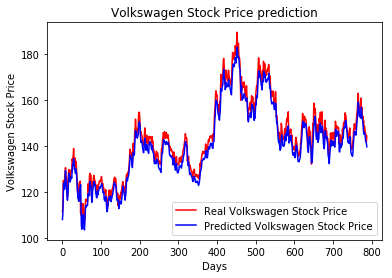

In [14]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Volkswagen Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volkswagen Stock Price')
plt.title('Volkswagen Stock Price prediction')
plt.xlabel('Days')
plt.ylabel('Volkswagen Stock Price')
plt.legend()
plt.show()

In [15]:
#Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

3.465779308698269

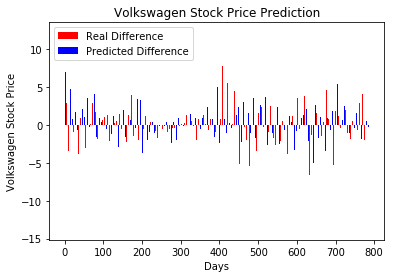

In [16]:
# Visualising the results
 
shift_pred= predicted_stock_price[:-1]
shift_pred = np.append(0, np.reshape(shift_pred, len(shift_pred)))
shift_real = real_stock_price[:-1]
shift_real = np.append(0, np.reshape(shift_real, len(shift_real)))
 
dif_pred = np.add(np.reshape(predicted_stock_price, len(predicted_stock_price)), - shift_pred)[1:]
dif_real = np.add(np.reshape(real_stock_price, len(real_stock_price)), - shift_real)[1:]
 
fig, ax = plt.subplots()
ind = np.arange(dif_real.size)
real_bar = ax.bar(ind-0.15, dif_real, width=0.3, color = 'red', label = 'Real Difference')
pred_bar = ax.bar(ind+0.15, dif_pred, width=0.3, color = 'blue', label = 'Predicted Difference')
ax.set_title('Volkswagen Stock Price Prediction')
ax.set_xlabel('Days')
ax.set_ylabel('Volkswagen Stock Price')
ax.legend()
plt.show()